In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 
class Layer:
    def __init__(self,W,b,f):
        self._W = W
        self._b = b
        self._f = f
    def input(self,x):
        return (np.dot(self._W, x) + self._b)
    def forward(self,x):
        return (self._f(np.dot(self._W,x) + self._b))
def sigmoid(u):
    return 1/(1+np.exp(-u))

def d_sigmoid(y):
    return y * (1 - y)

def ReLU(u):
    return u * (u > 0) 

def d_ReLU(y):
    return 1. * (y > 0)

def SE(T,z):
    return np.dot((T - z).T, T - z).flatten()[0]/2

def d_SE(t, y):
    return -(t - y)


epsilon = 0.1


Training set has 42000 rows and 785 columns
Test set has 28000 rows and 784 columns
(42000, 785)


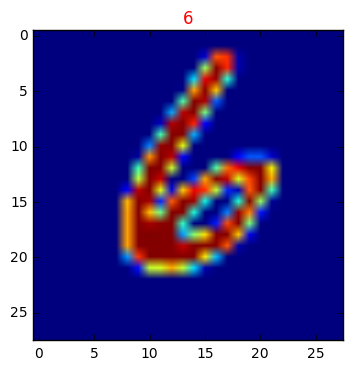

In [3]:
# The competition datafiles are in the directory ../input
# Read competition data files:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
# Write to the log:
print("Training set has {0[0]} rows and {0[1]} columns".format(train.shape))
print("Test set has {0[0]} rows and {0[1]} columns".format(test.shape))
# Any files you write to the current directory get shown as outputs
print (train.shape)
train_shuffle = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
label = train_shuffle.label
train_data = train_shuffle.ix[: , 1: ]
#train_data = train_data.reindex(np.random.permutation(train_data.index)).reset_index(drop=True)
#train_data = train_data.reindex(np.random.permutation(train_data.index))
#.reset_index(drop=True)
#= train_data.reindex(np.random.permutation(train_data.index))
i = 200
a = np.array(train_data[i:i+1]).reshape(28,28)
plt.imshow(a)
plt.title(label[i], color='red')

In [4]:
W1 = np.random.randn(100, 784)
b1 = np.random.randn(100, 1)
L1 = Layer(W1,b1,sigmoid)

W2 = np.random.randn(784, 100)
b2 = np.random.randn(784, 1)
L2 = Layer(W2, b2, sigmoid)
train_data = train.ix[: , 1: ]
train_data = np.float32(train_data)/255
label = train.label/10

16.9492923322
15.2542411242
13.4777597864
12.8807184895
11.933260667
11.4549950087
11.2193681453
11.043557989
10.8377265154
10.6017482257
10.3095266346
10.1093141437
9.99124998798
9.56623966602
9.25896503304
8.97169296657
8.71939761839
8.59295280112
8.47654880393
8.33004506272



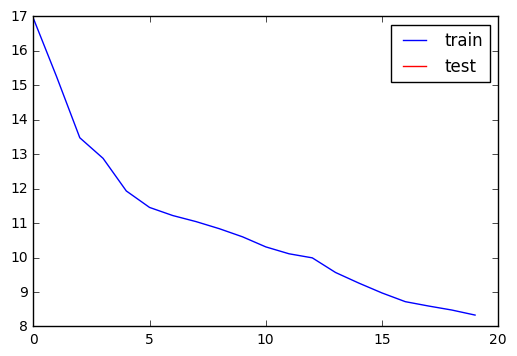

In [6]:

history_train_SE = []
history_test_SE = []
error = 0
train_len = len(train)
epoch = 20
train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
train_data = train_data.ix[: , 1: ]
train_data = np.float32(train_data)/255
label = train.label/10
for loop in tqdm_notebook(range(epoch)):
    train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
    train_data = train_data.ix[: , 1: ]
    train_data = np.float32(train_data)/255
    label = train.label/10
    
    for iteration in tqdm_notebook(range(train_len)):
        X = train_data[iteration: iteration+1].reshape(784, 1)
        t = X
        Y1 = L1.forward(X)
        y2 = L2.forward(Y1)
        error += SE(t, y2)

        delta2 = d_SE(t, y2) * d_sigmoid(y2)
        delta1 = np.dot(L2._W.T, delta2) * d_sigmoid(Y1)

        d_W2 = np.dot(delta2, Y1.T)
        L2._W -= epsilon * d_W2
        L2._b -= epsilon * delta2

        d_W1 = np.dot(delta1, X.T)
        L1._W -= epsilon * d_W1
        L1._b -= epsilon * delta1

    error = error/train_len
    print(error)
    history_train_SE.append(error)
    error = 0

plt.plot(range(len(history_train_SE)), history_train_SE, label="train", color="blue")
plt.plot(range(len(history_test_SE)),  history_test_SE,  label="test",  color="red")
plt.legend(loc='upper right')
plt.show()

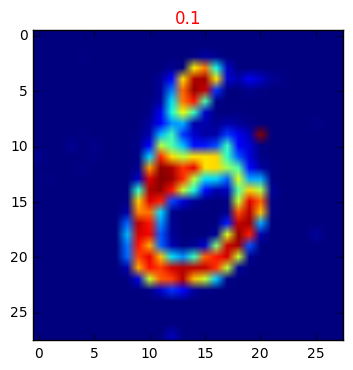

In [9]:
i = 32
#a = np.array(train_data[i:i+1]).reshape(28,28)
#plt.imshow(a)
#plt.title(label[i], color='red')

length =40
random = np.int(np.random.rand() * length)
x0 = train_data[random: random+1].reshape(784, 1)
t = x0
#t = label[random]
y1 = L1.forward(x0)
y2 = L2.forward(y1)
a = y2.reshape(28,28)
plt.imshow(a)
#plt.show(b)
plt.title(label[random], color='red')

b = np.array(train_data[random: random+1]).reshape(28,28)
#plt.imshow(b)
plt.title(label[random], color='red')
#plt.show(b)

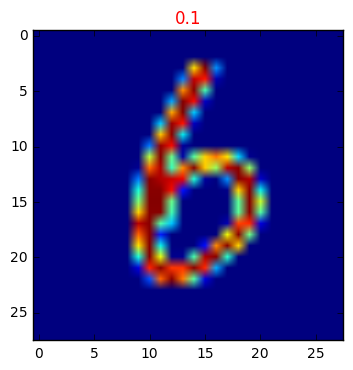

In [10]:
b = np.array(train_data[random: random+1]).reshape(28,28)
plt.imshow(b)
plt.title(label[random], color='red')
#plt.show(b)